<a href="https://colab.research.google.com/github/jameseconnolly/jameseconnolly.github.io/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [43]:
# // Cleaning and merging df's
df=pd.read_csv('WorldNetZero.csv')
df0=pd.read_csv('CCS.csv')
df_merged = pd.merge(df, df0, on='Country Code')
df_merged = df_merged.drop(columns=["Unnamed: 0", "Country Name_y","Country Code","Target Status","Detailed Plan","Reporting Mechanism","CO₂ Removal"])
df_merged.rename(columns={'Country Name_x': 'Country Name'}, inplace=True)
df_merged.dropna(subset=['Net-zero Target'], inplace=True)

In [25]:
df_merged

,Country Name,Net-zero Target,GHG,Carbon Capture Requirement
0,Angola,2030.0,128290000.0,3
1,Argentina,2050.0,398910000.0,14
2,Austria,2050.0,69800000.0,24
3,Belgium,2050.0,108220000.0,28
4,Bangladesh,2050.0,237700000.0,33
...,...,...,...,...
80,Turkey,2053.0,459860000.0,43
81,Ukraine,2060.0,221290000.0,49
82,Uzbekistan,2030.0,185390000.0,38
83,Venezuela,2030.0,299600000.0,14


In [44]:
# // Import PCA and preprocessor
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [45]:
# // Create new df to ignore country names
dataframe = df_merged[['Net-zero Target','GHG','Carbon Capture Requirement']]

In [47]:
# // Scale data
datascaled = pd.DataFrame(preprocessing.scale(dataframe),columns = dataframe.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [48]:
# // Reduce dimension to two dimensions
pca = PCA(2)

projected = pca.fit_transform(datascaled)

print(dataframe.shape)
print(projected.shape)

(82, 3)
(82, 2)


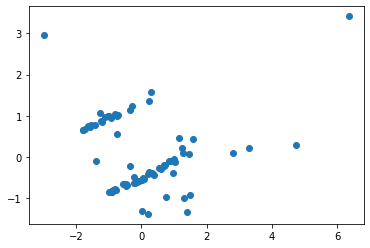

In [49]:
# // Plot data
plt.scatter(projected[:, 0], projected[:, 1])

In [50]:
# // Add component 1 and 2 two csv, so visualisation can be exported into vega
df_merged['Component 1'] = projected[:, 0]
df_merged['Component 2'] = projected[:, 1]
df_merged.to_csv('PCA.csv')